In [1]:
import pandas as pd
import json
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('data_100.json') as json_file:
    jsondata = json.load(json_file)
 
data_file = open('jsonoutput_100.csv', 'w', newline='')
csv_writer = csv.writer(data_file)
 
count = 0
for data in jsondata:
    if count == 0:
        header = data.keys()
        csv_writer.writerow(header)
        count += 1
    csv_writer.writerow(data.values())
 
data_file.close()


In [2]:
output_csv = pd.read_csv('jsonoutput_100.csv')

In [3]:
output_csv.head()

,status,resolver,domain,response_time,size_or_error,datetime
0,ok,https://dns.google/dns-query,google.com,64.014572,44.0,Wed Jul 7 22:01:30 2021
1,ok,https://dns.google/dns-query,netflix.com,68.006540,77.0,Wed Jul 7 22:01:30 2021
2,ok,https://dns.aa.net.uk/dns-query,google.com,542.697981,44.0,Wed Jul 7 22:01:30 2021
3,ok,https://dns.aa.net.uk/dns-query,netflix.com,551.804372,213.0,Wed Jul 7 22:01:30 2021
4,ok,https://adfree.usableprivacy.net/dns-query,google.com,925.139516,44.0,Wed Jul 7 22:01:31 2021


In [4]:
array_of_resolvers=pd.Series(output_csv['resolver']).unique()

In [5]:
array_of_resolvers[2]

'https://adfree.usableprivacy.net/dns-query'

In [6]:
dict_resp_time_series={}

In [7]:
array_of_resolvers

array(['https://dns.google/dns-query', 'https://dns.aa.net.uk/dns-query',
       'https://adfree.usableprivacy.net/dns-query',
       'https://dns.adguard.com/dns-query',
       'https://dns-family.adguard.com/dns-query',
       'https://doh.in.ahadns.net/dns-query',
       'https://doh.la.ahadns.net/dns-query',
       'https://doh.nl.ahadns.net/dns-query',
       'https://dns.alidns.com/dns-query',
       'https://dnsnl.alekberg.net/dns-query',
       'https://dns.arapurayil.com/dns-query',
       'https://dohtrial.att.net/dns-query',
       'https://dnses.alekberg.net/dns-query',
       'https://doh.bortzmeyer.fr/dns-query',
       'https://dns.circl.lu/dns-query',
       'https://doh.opendns.com/dns-query',
       'https://dns.cloudflare.com/dns-query',
       'https://family.cloudflare-dns.com/dns-query',
       'https://security.cloudflare-dns.com/dns-query',
       'https://odvr.nic.cz/dns-query',
       'https://dns.digitale-gesellschaft.ch/dns-query',
       'https://dns1.ryan-

In [8]:
length=len(array_of_resolvers)
print(length)

66


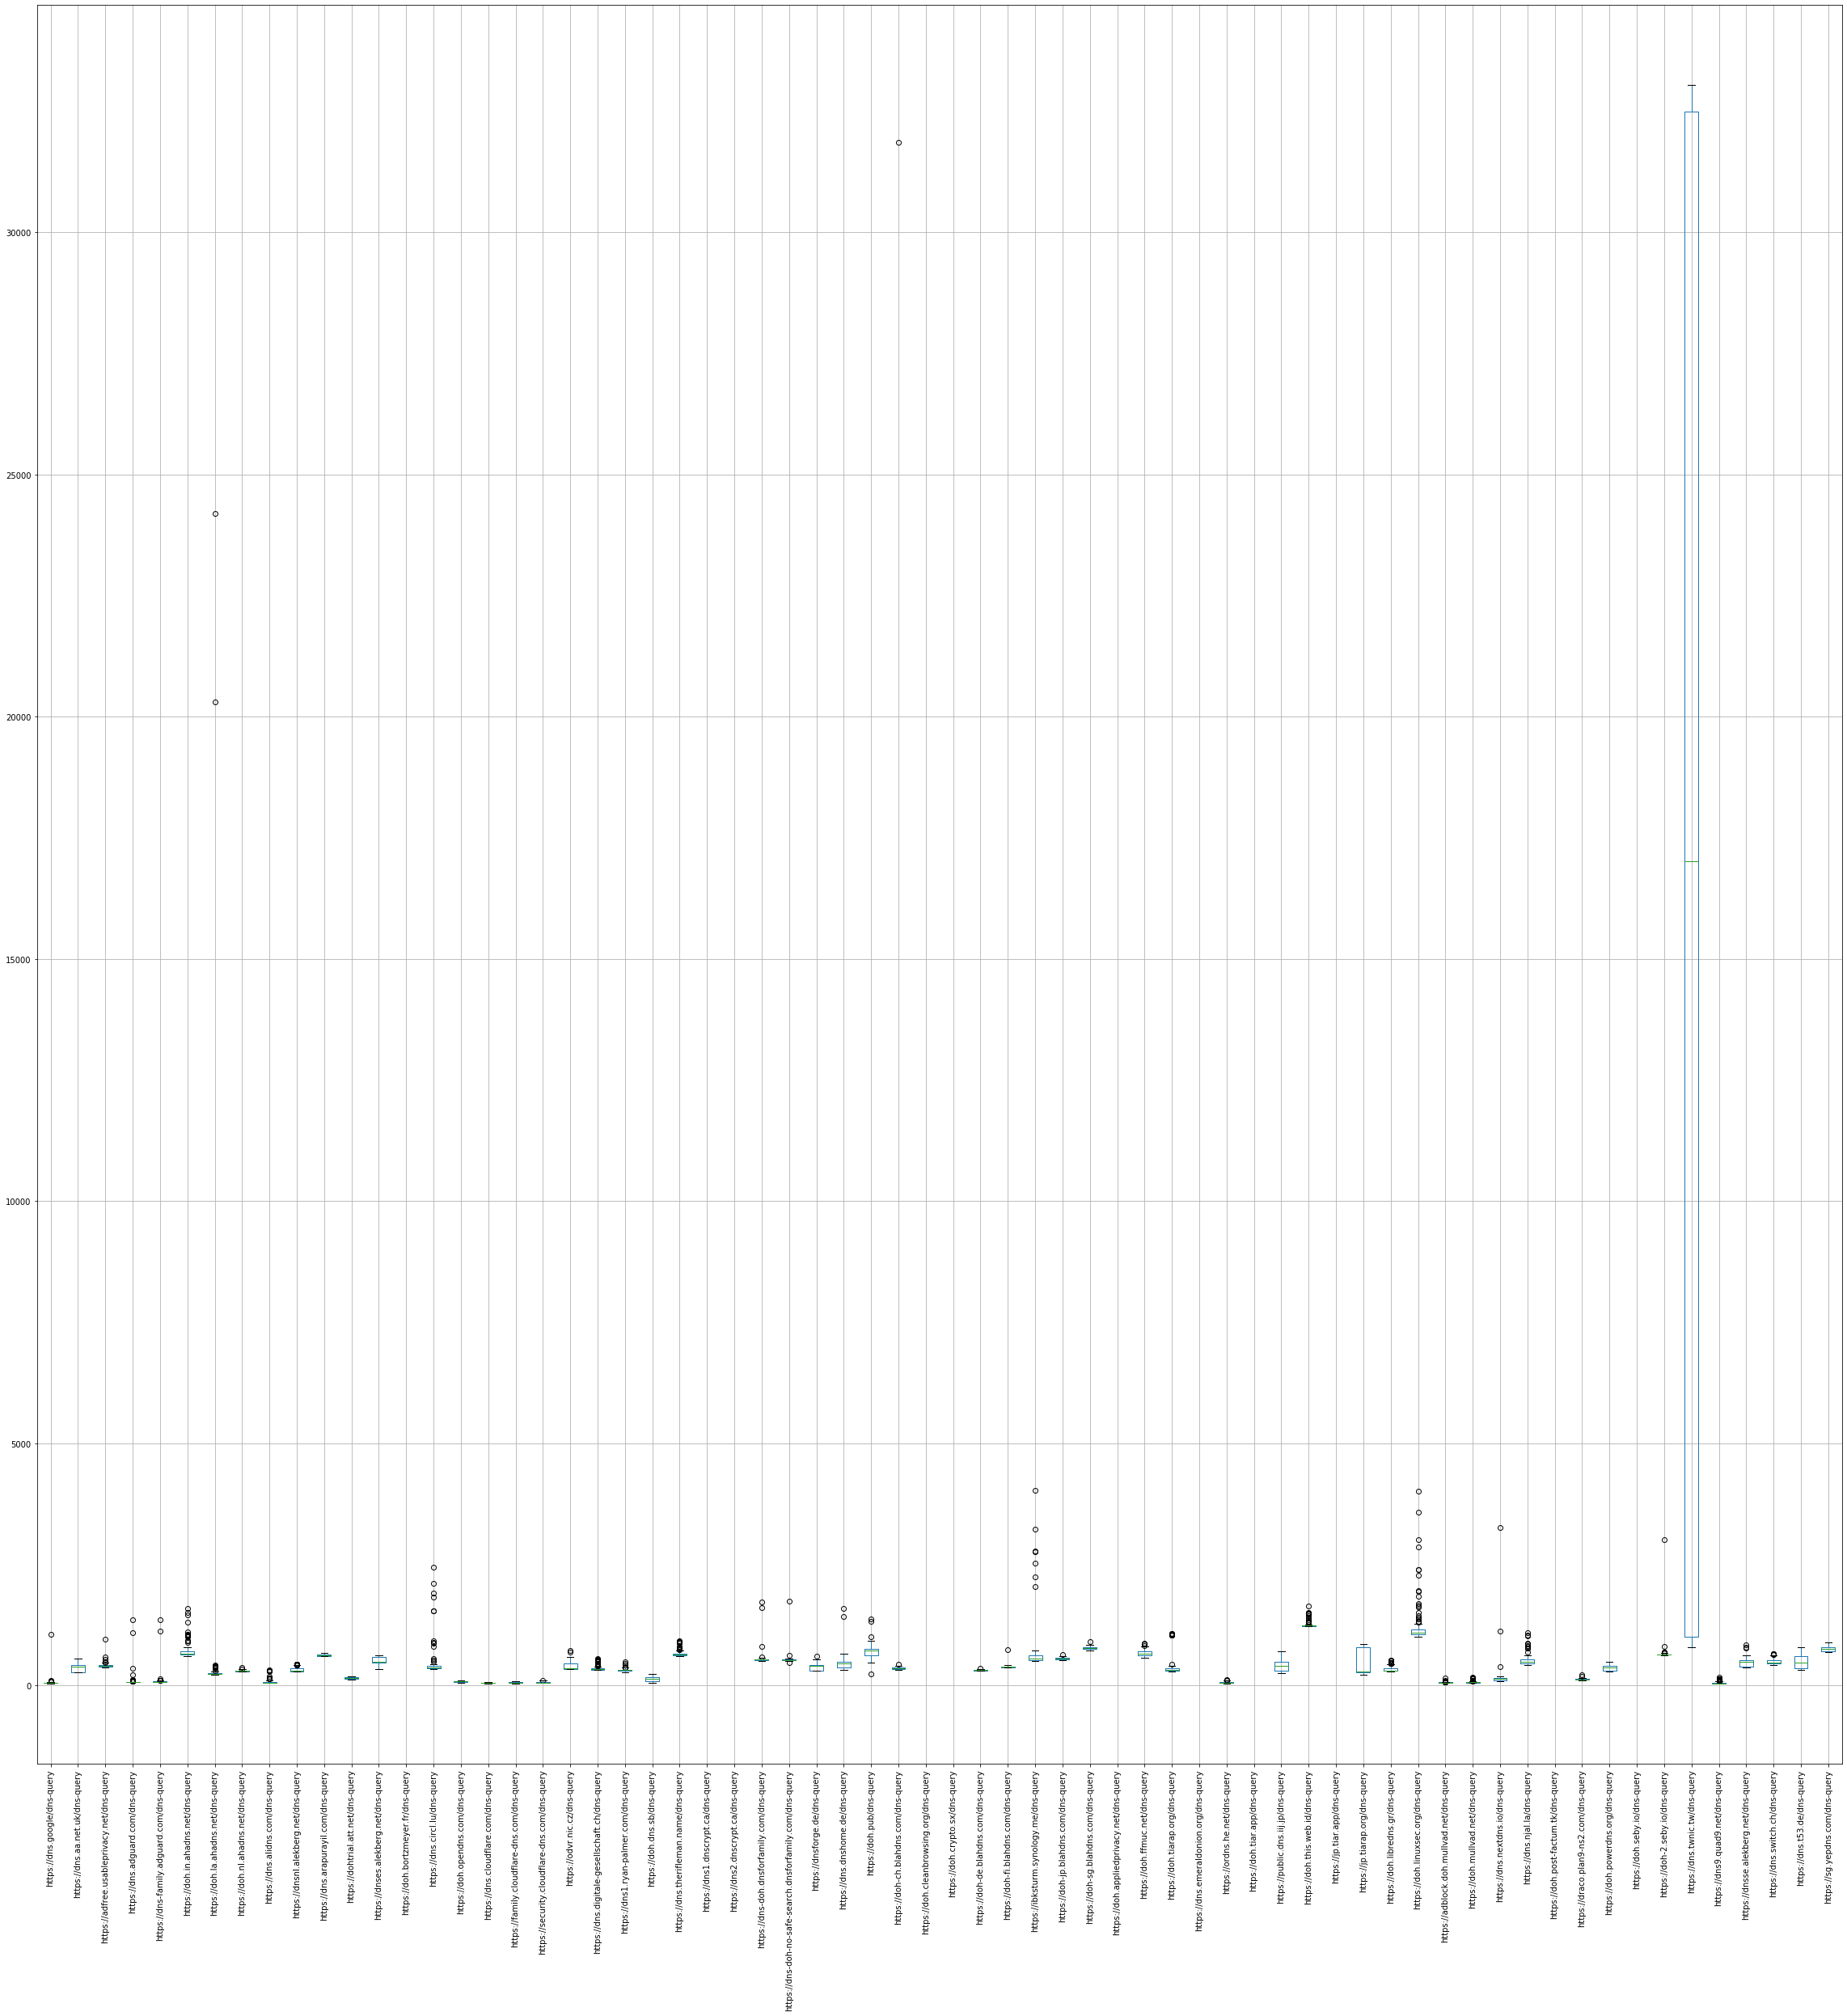

In [11]:
netflix_resp=[0]*length
resp_time_series=[0]*length
for i in range(length):
    netflix_resp[i]=output_csv[(output_csv['resolver']==array_of_resolvers[i]) & (output_csv['domain'] == 'netflix.com')]
    resp_time_series[i]=(netflix_resp[i]['response_time'])
    dict_resp_time_series[array_of_resolvers[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)
boxplot=frame_to_plot.boxplot(rot = 90, figsize = (40, 40))


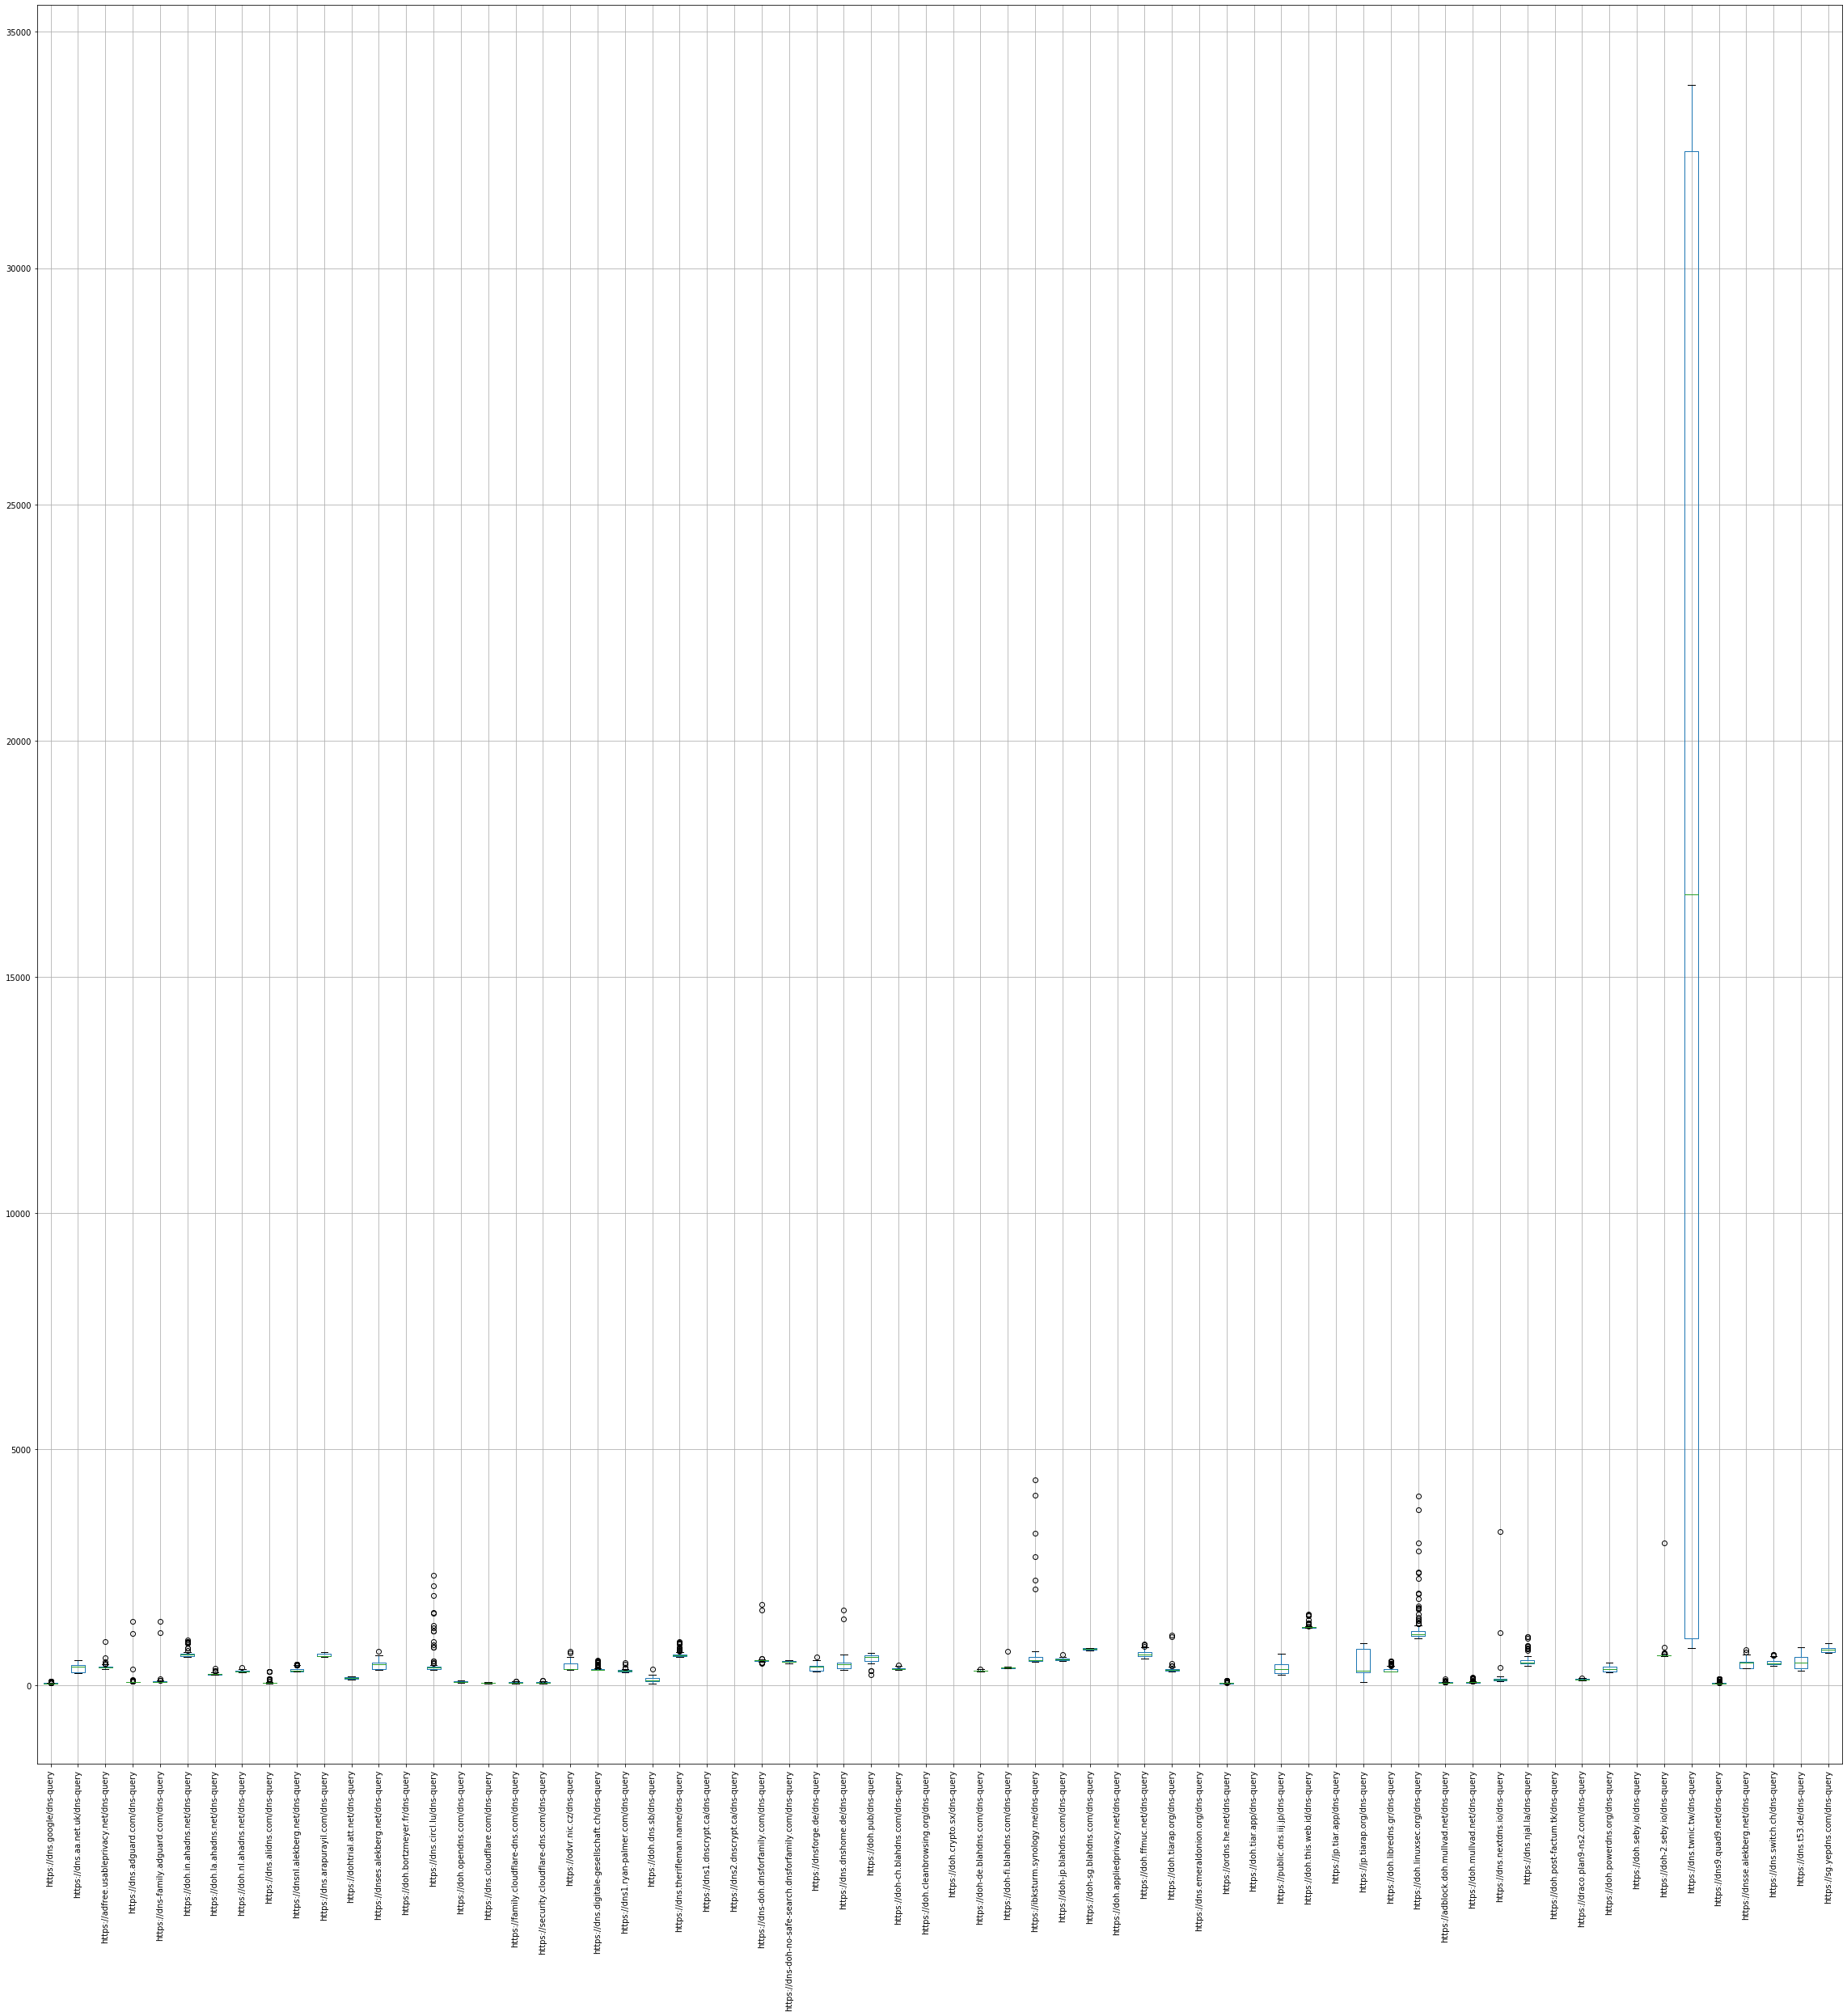

In [13]:
netflix_resp=[0]*length
resp_time_series=[0]*length
dict_resp_time_series={}
for i in range(length):
    netflix_resp[i]=output_csv[(output_csv['resolver']==array_of_resolvers[i]) & (output_csv['domain'] == 'google.com')]
    resp_time_series[i]=(netflix_resp[i]['response_time'])
    dict_resp_time_series[array_of_resolvers[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)
boxplot=frame_to_plot.boxplot(rot = 90, figsize = (40, 40))

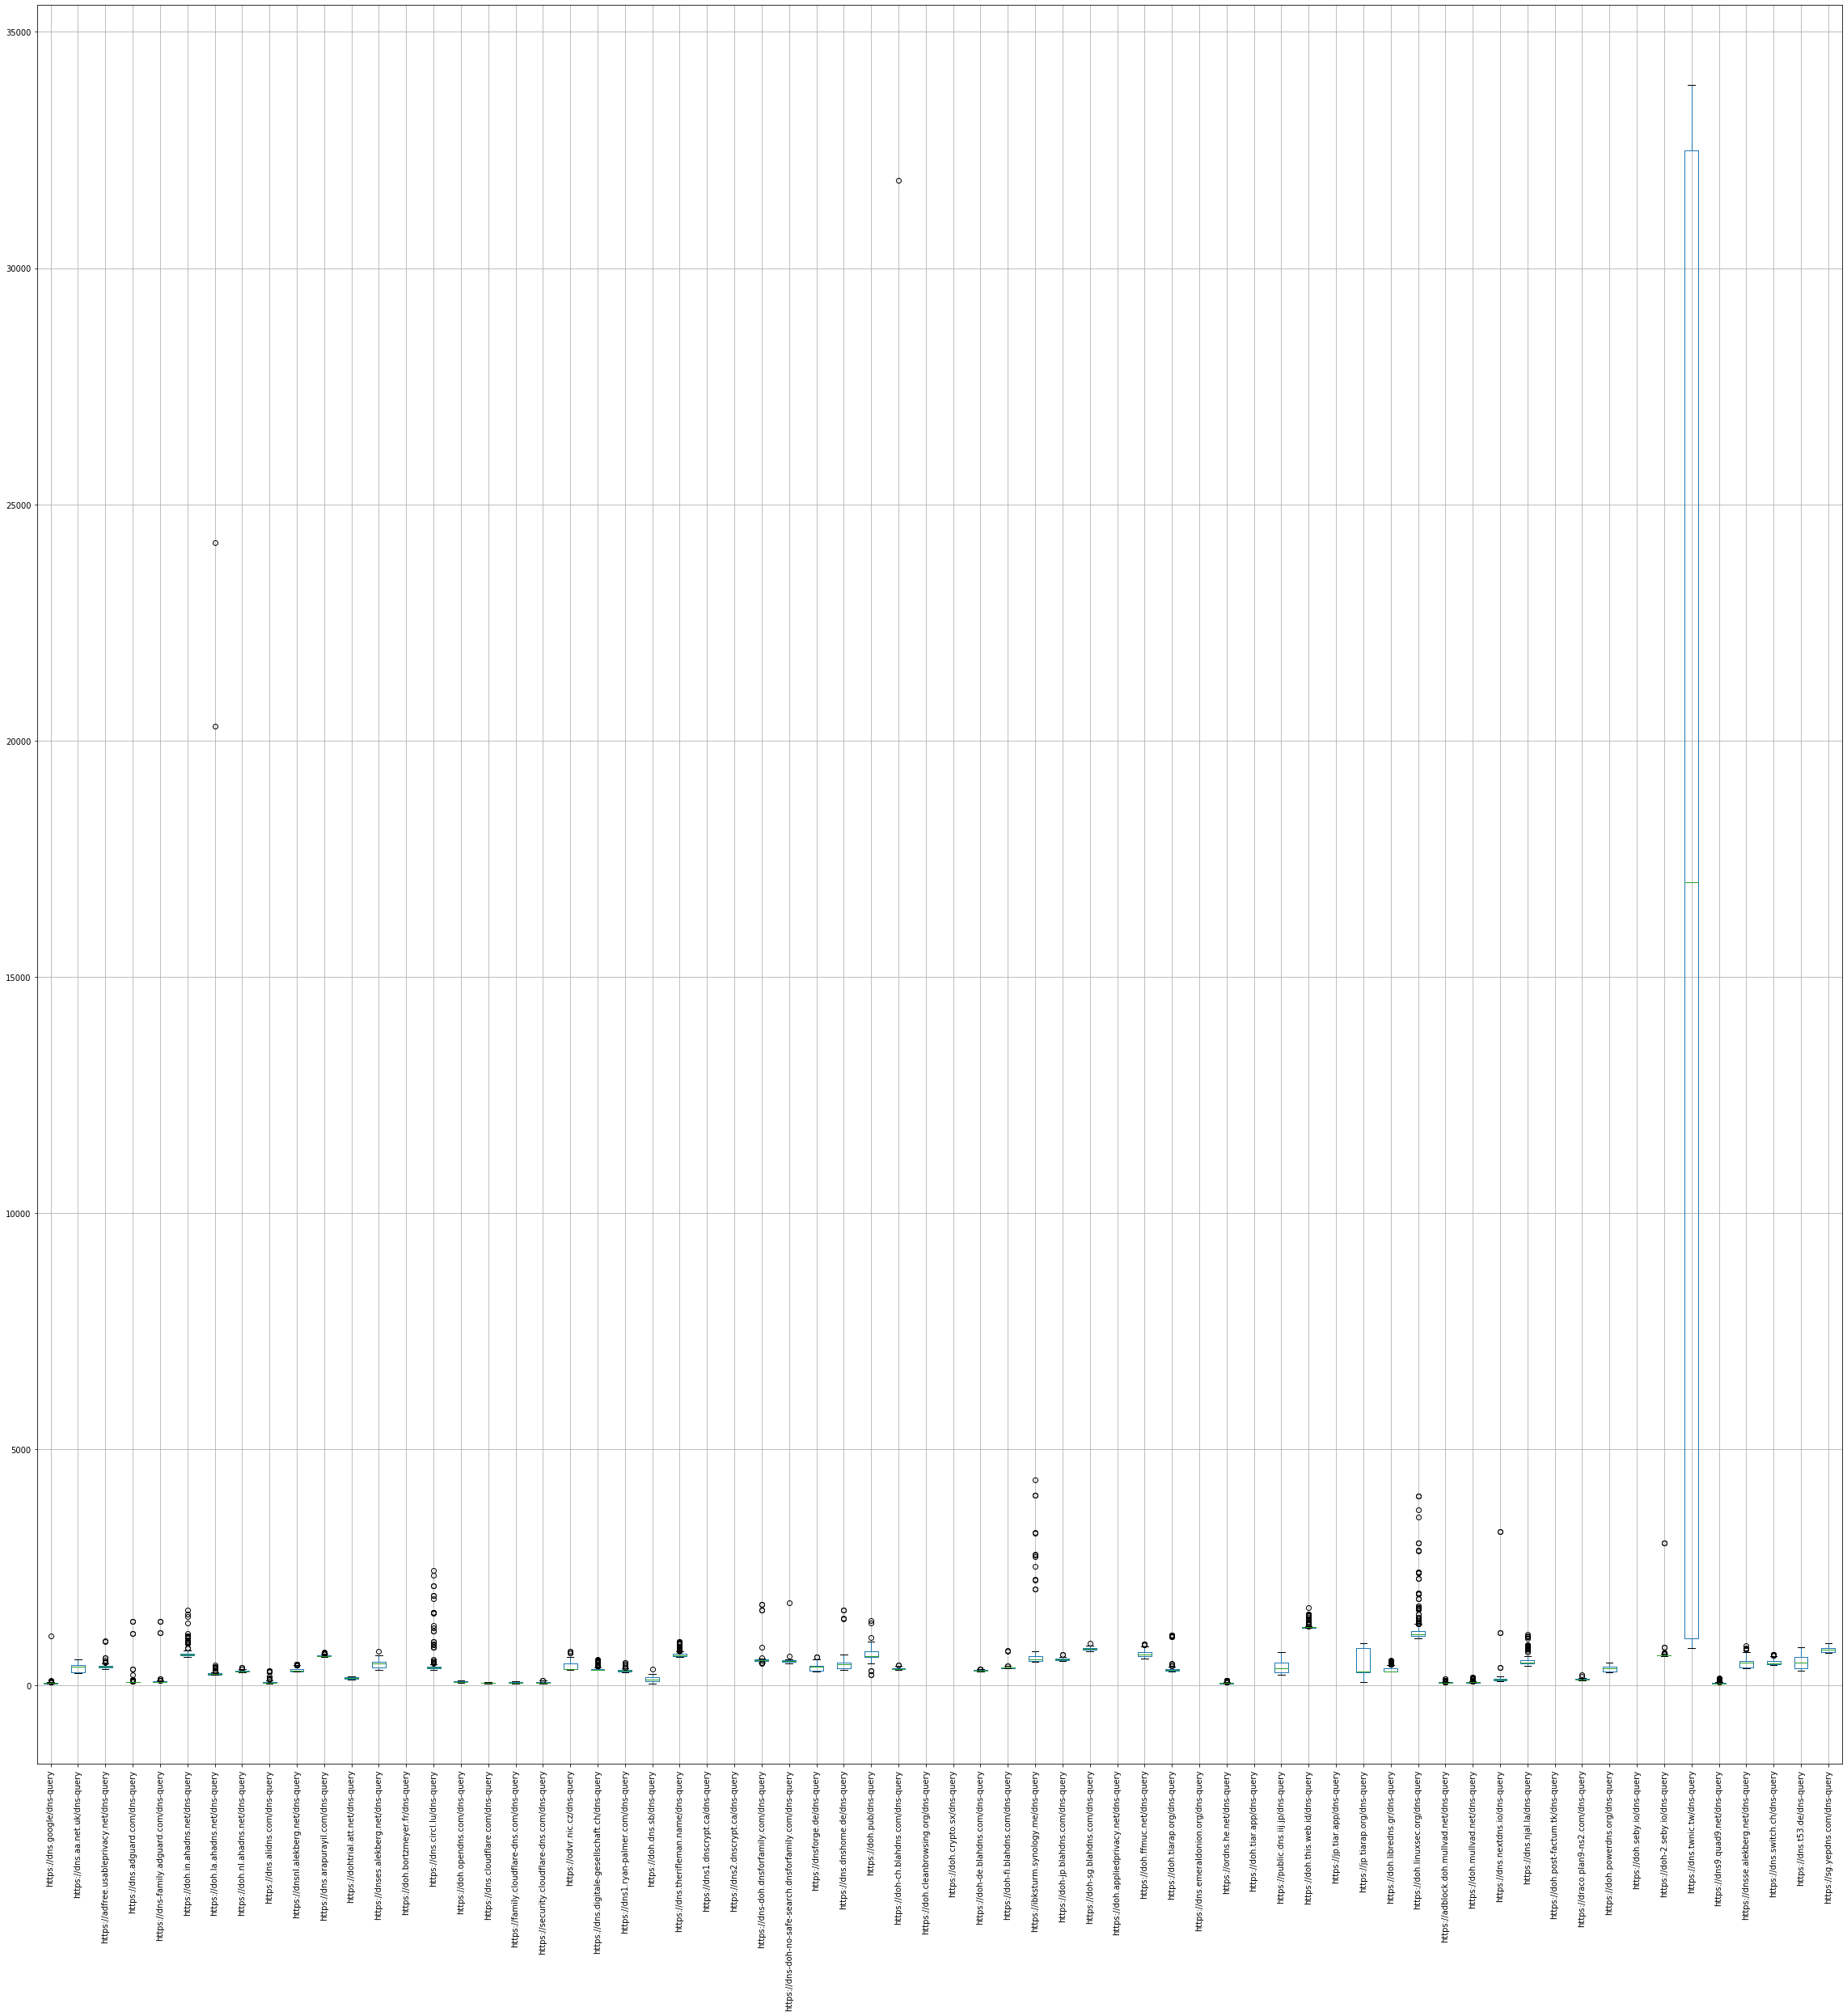

In [14]:
netflix_resp=[0]*length
resp_time_series=[0]*length
dict_resp_time_series={}
for i in range(length):
    netflix_resp[i]=output_csv[(output_csv['resolver']==array_of_resolvers[i])]
    resp_time_series[i]=(netflix_resp[i]['response_time'])
    dict_resp_time_series[array_of_resolvers[i]]= resp_time_series[i]
frame_to_plot=pd.DataFrame(dict_resp_time_series)
boxplot=frame_to_plot.boxplot(rot = 90, figsize = (40, 40))